In [1]:
import numpy as np
import cv2 as cv
import glob
import time
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
detector = cv.dnn.readNetFromDarknet(darknetModel="yolov3.weights", cfgFile="yolov3.cfg")

def img_pipeline_yolo(image):
    h, w = image.shape[:2]
    layer_names = detector.getLayerNames()
    out_layer_names = [layer_names[i - 1] for i in detector.getUnconnectedOutLayers()]

    blob = cv.dnn.blobFromImage(image, 1 / 255.0, (416, 416), crop=False, swapRB=False)
    detector.setInput(blob)

    layers_output = detector.forward(out_layer_names)
    boxes, confidences, classIDs = [], [], []
    for output in layers_output:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > 0.5 and classID == 2:
                box = detection[:4] * np.array([w, h, w, h])
                bx, by, bw, bh = box.astype(int)
                x, y, = int(bx - bw / 2), int(by - bh / 2)
                boxes.append([x, y, bw, bh])
                confidences.append(confidence)
                classIDs.append(classID)

    indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
    for idx in indices:
        x, y, bw, bh = boxes[idx]
        cv.rectangle(image, (x, y), (x + bw, y + bh), color=(0, 255, 255), thickness=2)

    return image

In [3]:
def display_img(img_path):
    img = plt.imread("./test_images/" + img_path)
    img = img_pipeline_yolo(img)
    plt.imshow(img)
    

## TEST IMG 1

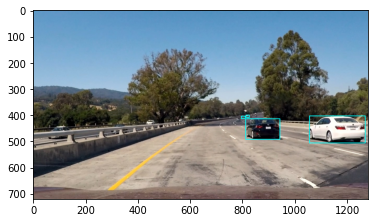

In [4]:
display_img("test1.jpg")

# TEST IMG 2

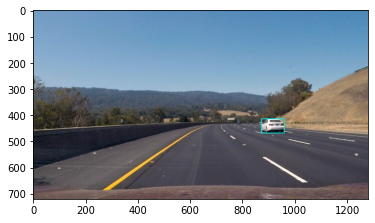

In [5]:
display_img("test3.jpg")

# TEST IMG 3

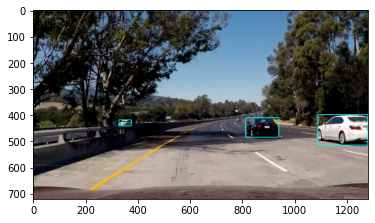

In [6]:
display_img("test5.jpg")

# TEST IMG 4

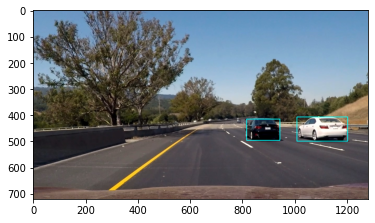

In [7]:
display_img("test6.jpg")

# TEST IMG 5

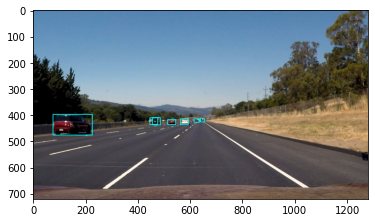

In [8]:
display_img("straight_lines2.jpg")